# Seaborn
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

#### Keys Features 
* Seaborn is a statistical plotting library
* It has beautiful default styles
* It also is designed to work very well with Pandas dataframe objects.

#### Installing and getting started
To install the latest release of seaborn, you can use pip:

<b>pip install seaborn</b>

It’s also possible to install the released version using conda:

<b>conda install seaborn</b>

Alternatively, you can use pip to install the development version directly from github:

<b>pip install git+https://github.com/mwaskom/seaborn.git</b>

Another option would be to to clone the github repository and install from your local copy:

pip install .
Dependencies
Python 2.7 or 3.5+

### Mandatory dependencies
numpy (>= 1.9.3)<br>
scipy (>= 0.14.0)<br>
matplotlib (>= 1.4.3)<br>
pandas (>= 0.15.2)<br>

### Recommended dependencies<br>
statsmodels (>= 0.5.0)<br>

#### Testing
To test seaborn, run make test in the root directory of the source distribution. This runs the unit test suite (using pytest, but many older tests use nose asserts). It also runs the example code in function docstrings to smoke-test a broader and more realistic range of example usage.

The full set of tests requires an internet connection to download the example datasets (if they haven’t been previously cached), but the unit tests should be possible to run offline.

#### Bugs
Please report any bugs you encounter through the github issue tracker. It will be most helpful to include a reproducible example on one of the example datasets (accessed through load_dataset()). It is difficult debug any issues without knowing the versions of seaborn and matplotlib you are using, as well as what matplotlib backend you are using to draw the plots, so please include those in your bug report.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
census_data = pd.read_csv('census_data.csv')
census_data.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [3]:
census_data.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
age               32561 non-null int64
workclass         32561 non-null object
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
gender            32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income_bracket    32561 non-null object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


### Visualizing Statistical Relationships

Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

We will discuss most of seaborn functions today-

#### Scatter plot
The scatter plot is a mainstay of statistical visualization. It depicts the joint distribution of two variables using a cloud of points, where each point represents an observation in the dataset. This depiction allows the eye to infer a substantial amount of information about whether there is any meaningful relationship between them.

There are several ways to draw a scatter plot in seaborn. The most basic, which should be used when both variables are numeric, is the scatterplot() function. 

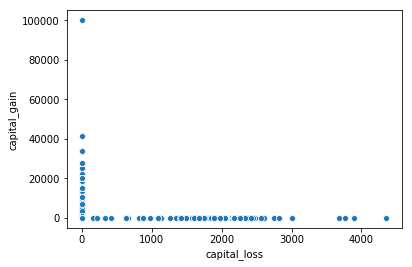

In [5]:
sns.scatterplot(x='capital_loss',y='capital_gain',data=census_data)

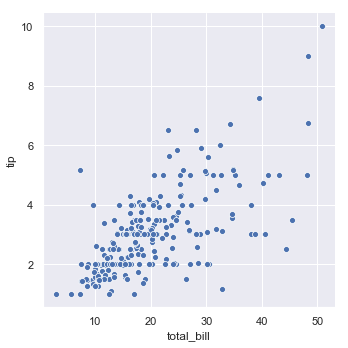

In [6]:
sns.set(style="darkgrid")
tips = sns.load_dataset("tips")              #tips is inbuild dataset in seaborn
sns.relplot(x="total_bill", y="tip", data=tips);

##### Note : The scatterplot() is the default kind in relplot() (it can also be forced by setting kind="scatter"):

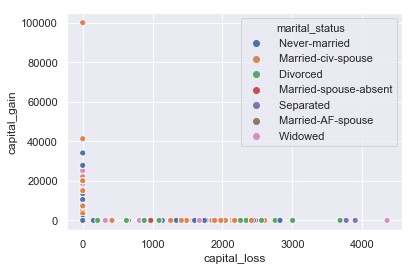

In [7]:
# adding some additional parameters
sns.scatterplot(x='capital_loss',y='capital_gain',hue='marital_status',data=census_data)

# hue:  Can be either categorical or numeric, although color mapping will
#          behave differently in latter case.

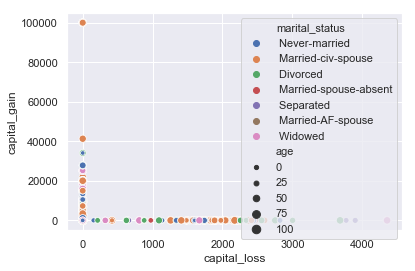

In [8]:
sns.scatterplot(x='capital_loss',y='capital_gain',hue='marital_status',size='age',data=census_data)

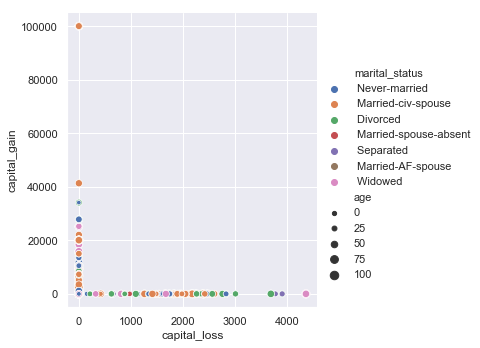

In [9]:
# As I said above the scatterplot() is the default kind in relplot() (it can also be forced by setting kind="scatter"):
# see difference
sns.relplot(x='capital_loss',y='capital_gain',hue='marital_status',size='age',data=census_data)

####  Line plot
Scatter plots are highly effective, but there is no universally optimal type of visualiation. Instead, the visual representation should be adapted for the specifics of the dataset and to the question you are trying to answer with the plot.

With some datasets, you may want to understand changes in one variable as a function of time, or a similarly continuous variable. In this situation, a good choice is to draw a line plot. In seaborn, this can be accomplished by the lineplot() function, either directly or with relplot() by setting kind="line":

'\nFigure-level interface for drawing relational plots onto a FacetGrid.\n\nThis function provides access to several different axes-level functions\nthat show the relationship between two variables with semantic mappings\nof subsets. The ``kind`` parameter selects the underlying axes-level\nfunction to use:\n\n- :func:`scatterplot` (with ``kind="scatter"``; the default)\n- :func:`lineplot` (with ``kind="line"``)\n'

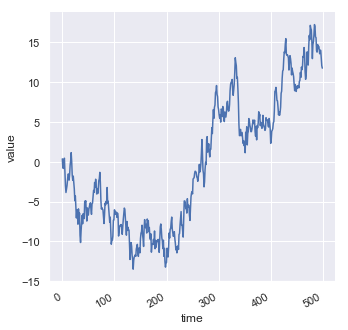

In [10]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

"""
Figure-level interface for drawing relational plots onto a FacetGrid.

This function provides access to several different axes-level functions
that show the relationship between two variables with semantic mappings
of subsets. The ``kind`` parameter selects the underlying axes-level
function to use:

- :func:`scatterplot` (with ``kind="scatter"``; the default)
- :func:`lineplot` (with ``kind="line"``)
"""

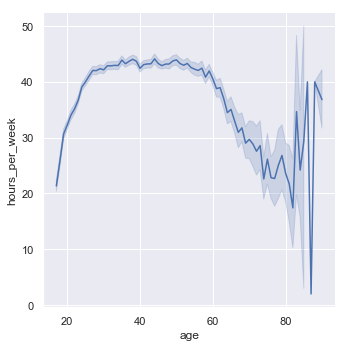

In [11]:
age_vs_hours_per_week = sns.relplot(x="age", y="hours_per_week", kind="line", data=census_data)

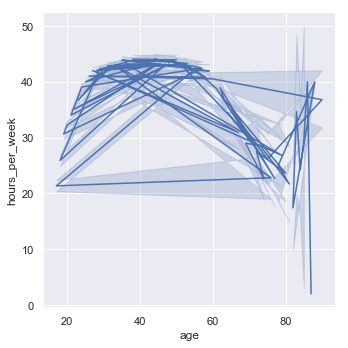

In [12]:
age_vs_hours_per_week = sns.relplot(x="age", y="hours_per_week", kind="line",sort=False, data=census_data)

Lineplot() assumes that you are most often trying to draw y as a function of x, the default behavior is to sort the data by the x values before plotting. However, this can be disabled:

#### Showing multiple relationships with facets
We’ve emphasized in this tutorial that, while these functions can show several semantic variables at once, it’s not always effective to do so. But what about when you do want to understand how a relationship between two variables depends on more than one other variable?

The best approach may be to make more than one plot. Because relplot() is based on the FacetGrid, this is easy to do. To show the influence of an additional variable, instead of assigning it to one of the semantic roles in the plot, use it to “facet” the visualization. This means that you make multiple axes and plot subsets of the data on each of them:

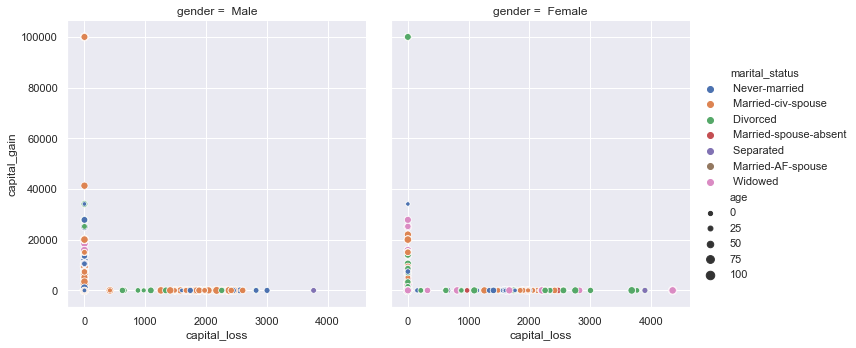

In [13]:
sns.relplot(x='capital_loss',y='capital_gain',hue='marital_status',size='age',col='gender',data=census_data)

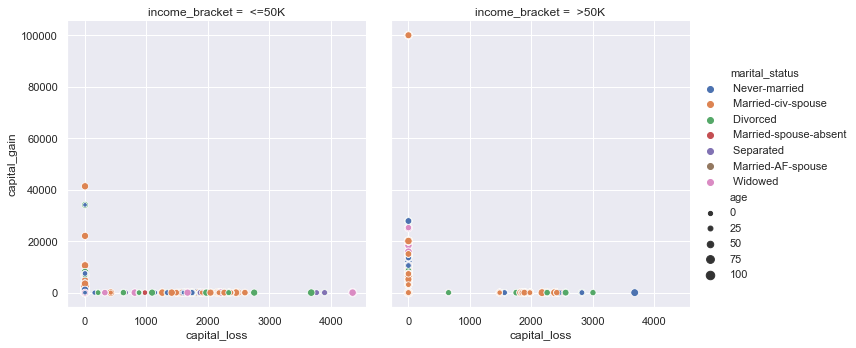

In [14]:
sns.relplot(x='capital_loss',y='capital_gain',hue='marital_status',size='age',col='income_bracket',data=census_data)

You can also show the influence two variables this way: one by faceting on the columns and one by faceting on the rows. As you start adding more variables to the grid, you may want to decrease the figure size. Remember that the size FacetGrid is parameterized by the height and aspect ratio of each facet:

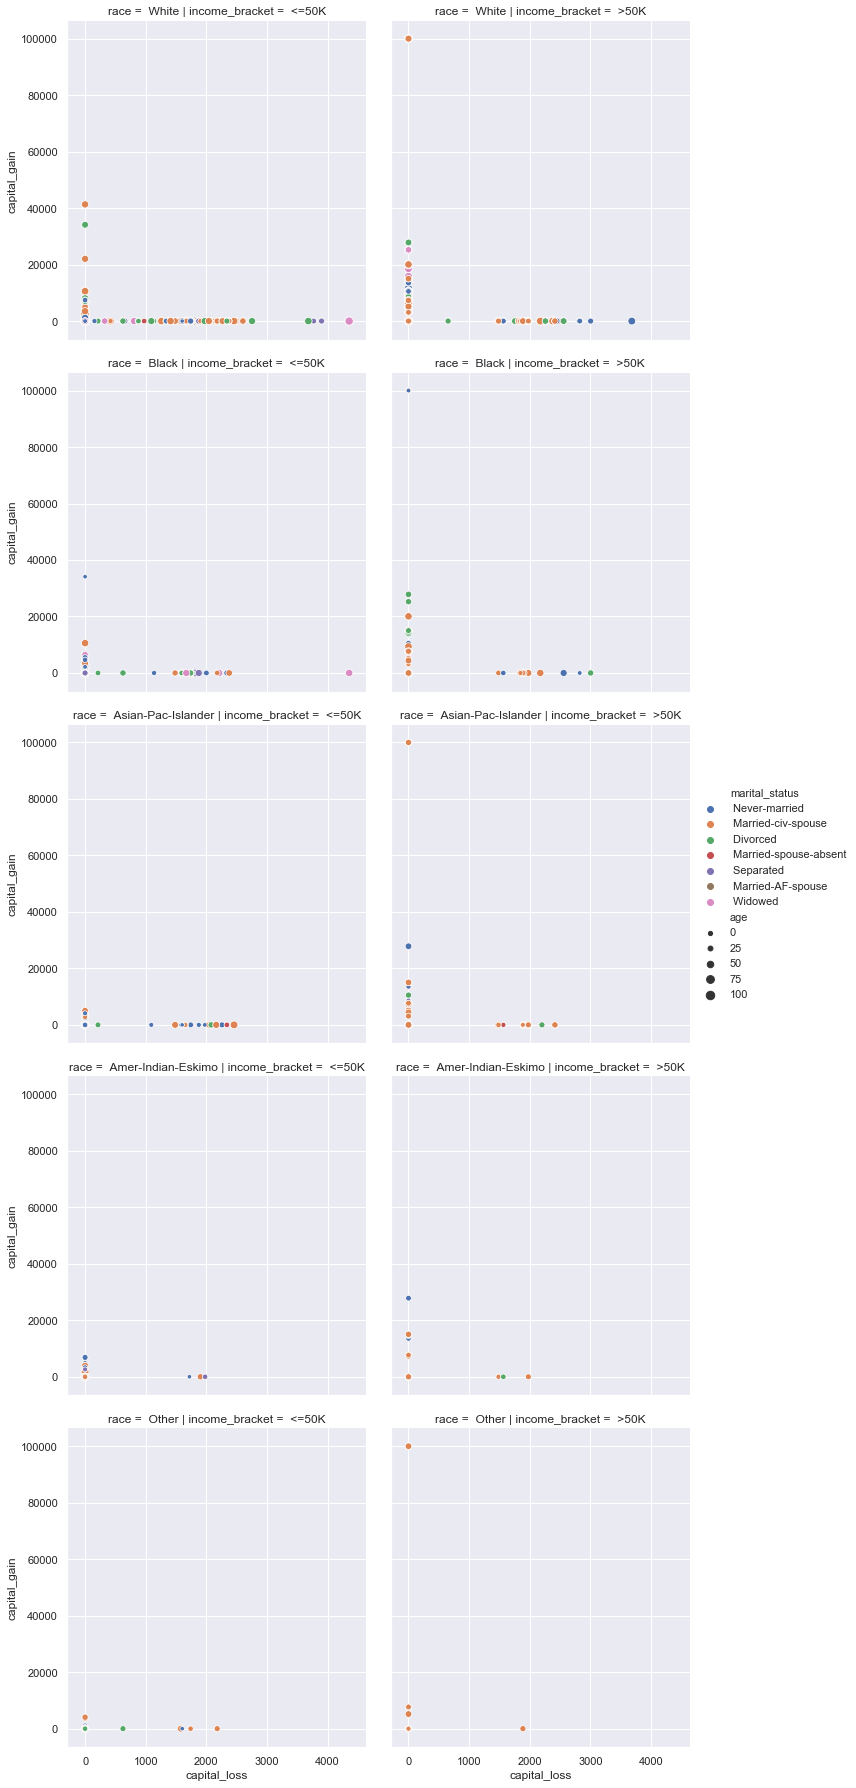

In [15]:
sns.relplot(x='capital_loss',y='capital_gain',hue='marital_status',size='age',col='income_bracket',row='race',height=5,data=census_data)

# Plotting with Categorical data

In the relational plot tutorial we saw how to use different visual representations to show the relationship between multiple variables in a dataset. In the examples, we focused on cases where the main relationship was between two numerical variables. If one of the main variables is “categorical” (divided into discrete groups) it may be helpful to use a more specialized approach to visualization.

In seaborn, there are several different ways to visualize a relationship involving categorical data. Similar to the relationship between relplot() and either scatterplot() or lineplot(), there are two ways to make these plots. There are a number of axes-level functions for plotting categorical data in different ways and a figure-level interface, catplot(), that gives unified higher-level access to them.

It’s helpful to think of the different categorical plot kinds as belonging to three different families, which we’ll discuss in detail below. They are:

<b>Categorical scatterplots:</b>

stripplot() (with kind="strip"; the default)<br>
swarmplot() (with kind="swarm")<br>

<b>Categorical distribution plots:</b>

boxplot() (with kind="box")<br>
violinplot() (with kind="violin")<br>
boxenplot() (with kind="boxen")<br>

<b>Categorical estimate plots:</b>

pointplot() (with kind="point")<br>
barplot() (with kind="bar")<br>
countplot() (with kind="count")<br>

These families represent the data using different levels of granularity.

The default representation of the data in catplot() uses a scatterplot. There are actually two different categorical scatter plots in seaborn. They take different approaches to resolving the main challenge in representing categorical data with a scatter plot, which is that all of the points belonging to one category would fall on the same position along the axis corresponding to the categorical variable. The approach used by stripplot(), which is the default “kind” in catplot() is to adjust the positions of points on the categorical axis with a small amount of random “jitter”:

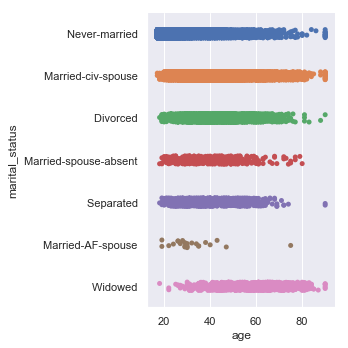

In [16]:
sns.catplot(x="age",y="marital_status",data=census_data)

The second approach adjusts the points along the categorical axis using an algorithm that prevents them from overlapping. It can give a better representation of the distribution of observations, although it only works well for relatively small datasets. This kind of plot is sometimes called a “beeswarm” and is drawn in seaborn by swarmplot(), which is activated by setting kind="swarm" in catplot():

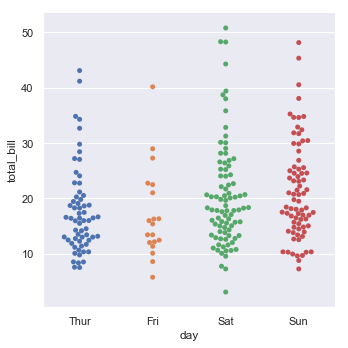

In [27]:
# sns.catplot(x="age",y="relationship",kind='swarm',data=census_data)
#  or
#sns.swarmplot(x="relationship",y="age",data=census_data)
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

Similar to the relational plots, it’s possible to add another dimension to a categorical plot by using a hue semantic. (The categorical plots do not currently support size or style semantics). Each different categorical plotting function handles the hue semantic differently. For the scatter plots, it is only necessary to change the color of the points:

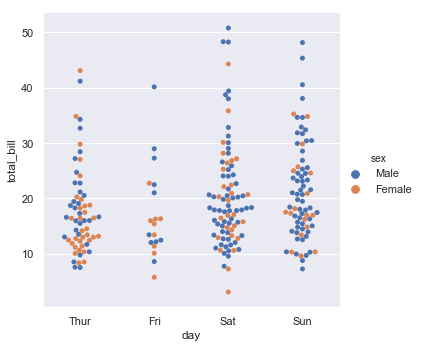

In [29]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

#### Box plot

The first is the familiar boxplot(). This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data.

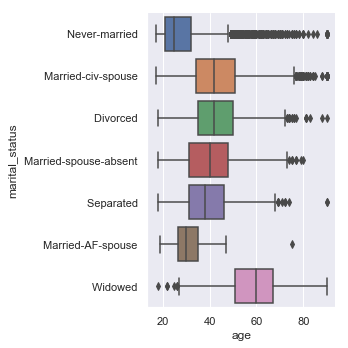

In [32]:
sns.catplot(x="age",y="marital_status",kind='box',data=census_data)

When adding a hue semantic, the box for each level of the semantic variable is moved along the categorical axis so they don’t overlap:



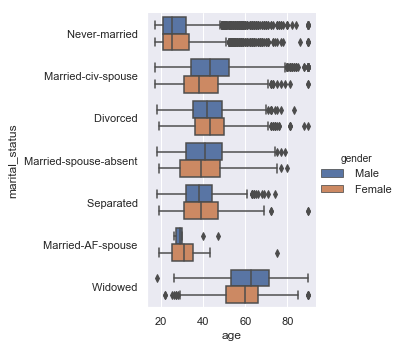

In [37]:
sns.catplot(x="age",y="marital_status",kind='box',hue='gender',data=census_data)

#### Violinplots
A different approach is a violinplot(), which combines a boxplot with the kernel density estimation procedure described in the distributions tutorial:

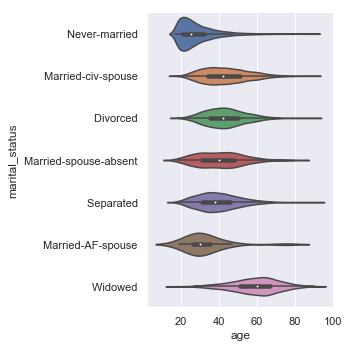

In [38]:
sns.catplot(x="age",y="marital_status",kind='violin',data=census_data)

This approach uses the kernel density estimate to provide a richer description of the distribution of values. Additionally, the quartile and whikser values from the boxplot are shown inside the violin. The downside is that, because the violinplot uses a KDE, there are some other parameters that may need tweaking, adding some complexity relative to the straightforward boxplot:

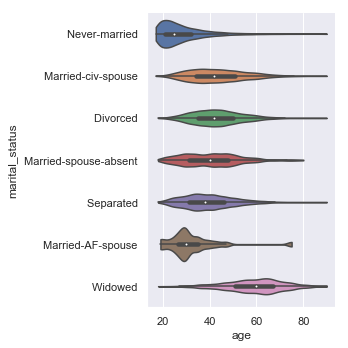

In [41]:
sns.catplot(x="age",y="marital_status",kind='violin',bw=.15, cut=0,data=census_data)

## Statistical estimation within categories
For other applications, rather than showing the distribution within each category, you might want to show an estimate of the central tendency of the values. Seaborn has two main ways to show this information. Importantly, the basic API for these functions is identical to that for the ones discussed above.

#### Bar plots
A familiar style of plot that accomplishes this goal is a bar plot. In seaborn, the barplot() function operates on a full dataset and applies a function to obtain the estimate (taking the mean by default). When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate and plots that using error bars:

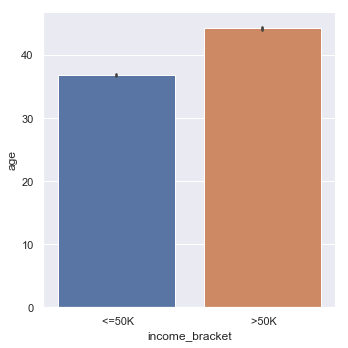

In [46]:
sns.catplot(x="income_bracket",y="age",kind='bar',data=census_data)

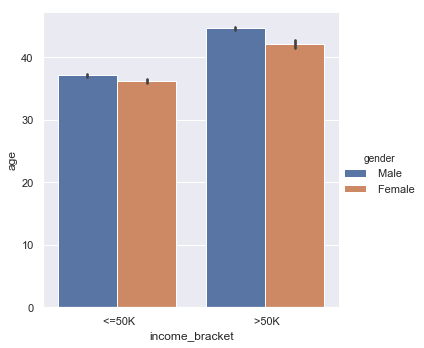

In [47]:
sns.catplot(x="income_bracket",y="age",kind='bar',hue='gender',data=census_data)

A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it’s easy to do so with the countplot() function:

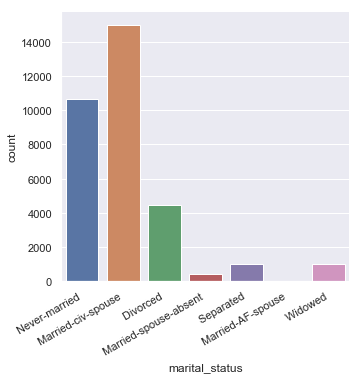

In [61]:
ax = sns.catplot(x='marital_status',kind='count',data=census_data,orient="h")
ax.fig.autofmt_xdate()

#### Point plots
An alternative style for visualizing the same information is offered by the pointplot() function. This function also encodes the value of the estimate with height on the other axis, but rather than showing a full bar, it plots the point estimate and confidence interval. Additionally, pointplot() connects points from the same hue category. This makes it easy to see how the main relationship is changing as a function of the hue semantic, because your eyes are quite good at picking up on differences of slopes:

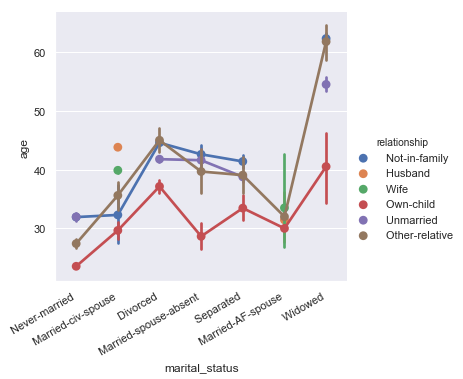

In [67]:
ax = sns.catplot(x='marital_status',y='age',hue='relationship',kind='point',data=census_data)
ax.fig.autofmt_xdate()

# Showing multiple relationships with facets
Just like relplot(), the fact that catplot() is built on a FacetGrid means that it is easy to add faceting variables to visualize higher-dimensional relationships:

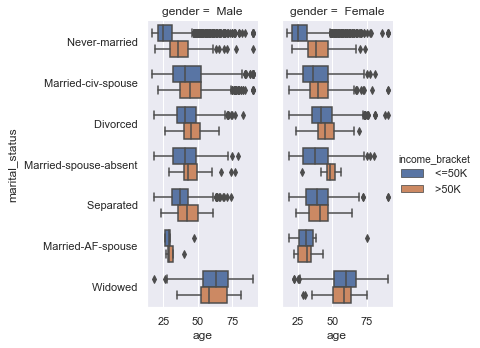

In [78]:
sns.catplot(x="age", y="marital_status", hue="income_bracket",
            col="gender", aspect=.6,
            kind="box", data=census_data);

# Visualizing the distribution of a dataset

When dealing with a set of data, often the first thing you’ll want to do is get a sense for how the variables are distributed. I will give a brief introduction to some of the tools in seaborn for examining univariate and bivariate distributions. You may also want to look at the categorical plots above, that make it easy to compare the distribution of a variable across levels of other variables.

## Plotting univariate distributions
The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot() function. By default, this will draw a histogram and fit a kernel density estimate (KDE).

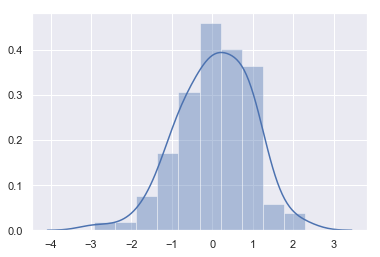

In [79]:
x = np.random.normal(size=100)
sns.distplot(x)

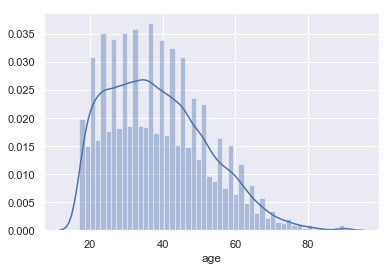

In [80]:
sns.distplot(census_data['age'])

#### Histograms
Histograms are likely familiar, and a hist function already exists in matplotlib. A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

To illustrate this, let’s remove the density curve and add a rug plot, which draws a small vertical tick at each observation. You can make the rug plot itself with the rugplot() function, but it is also available in distplot():

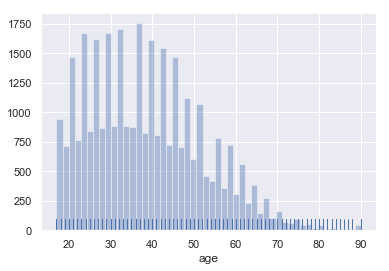

In [82]:
sns.distplot(census_data['age'],rug=True,kde=False)

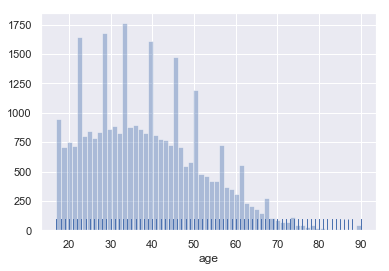

In [85]:
# Let's add some bins to it
sns.distplot(census_data['age'],bins=60,rug=True,kde=False)

#### Kernel density estimation
The kernel density estimate may be less familiar, but it can be a useful tool for plotting the shape of a distribution. Like the histogram, the KDE plots encode the density of observations on one axis with height along the other axis:

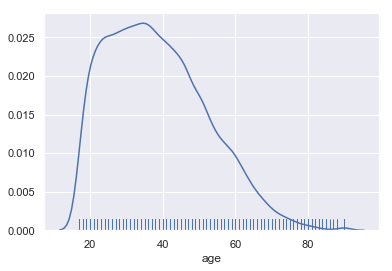

In [86]:
sns.distplot(census_data['age'],rug=True,hist=False)

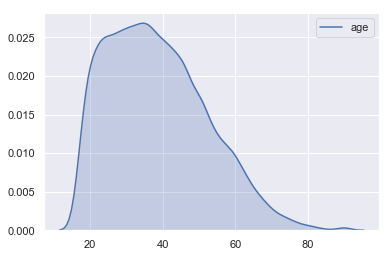

In [90]:
sns.kdeplot(census_data['age'],shade=True)

## Plotting bivariate distributions
It can also be useful to visualize a bivariate distribution of two variables. The easiest way to do this in seaborn is to just use the jointplot() function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.

#### Scatterplots
The most familiar way to visualize a bivariate distribution is a scatterplot, where each observation is shown with point at the x and y values. This is analgous to a rug plot on two dimensions. You can draw a scatterplot with the matplotlib plt.scatter function, and it is also the default kind of plot shown by the jointplot() function:

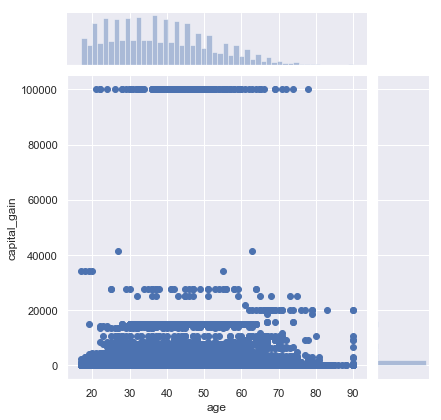

In [96]:
sns.jointplot(x='age',y='capital_gain',data=census_data)

#### Hexbin plots
The bivariate analogue of a histogram is known as a “hexbin” plot, because it shows the counts of observations that fall within hexagonal bins. This plot works best with relatively large datasets. It’s available through the matplotlib plt.hexbin function and as a style in jointplot(). It looks best with a white background:

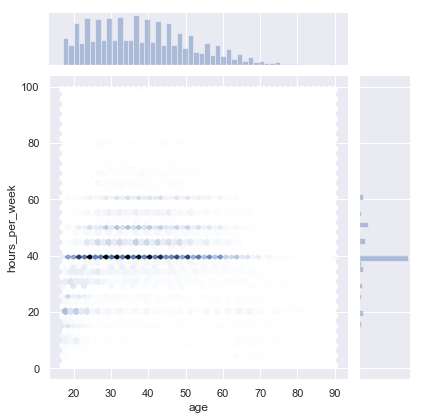

In [99]:
sns.jointplot(x='age',y='hours_per_week',kind='hex',data=census_data)

#### Kernel density estimation
It is also possible to use the kernel density estimation procedure described above to visualize a bivariate distribution. In seaborn, this kind of plot is shown with a contour plot and is available as a style in jointplot():

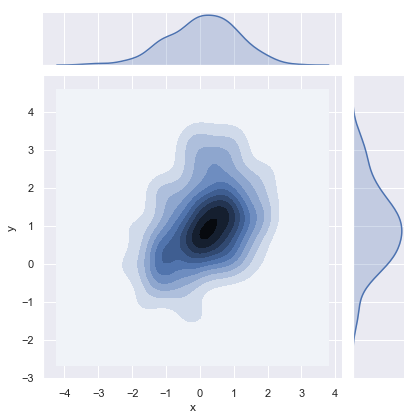

In [106]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
x, y = np.random.multivariate_normal(mean, cov, 1000).T
sns.jointplot(x="x", y="y", data=df, kind="kde")

### Visualizing pairwise relationships in a dataset
To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. by default, it also draws the univariate distribution of each variable on the diagonal Axes:

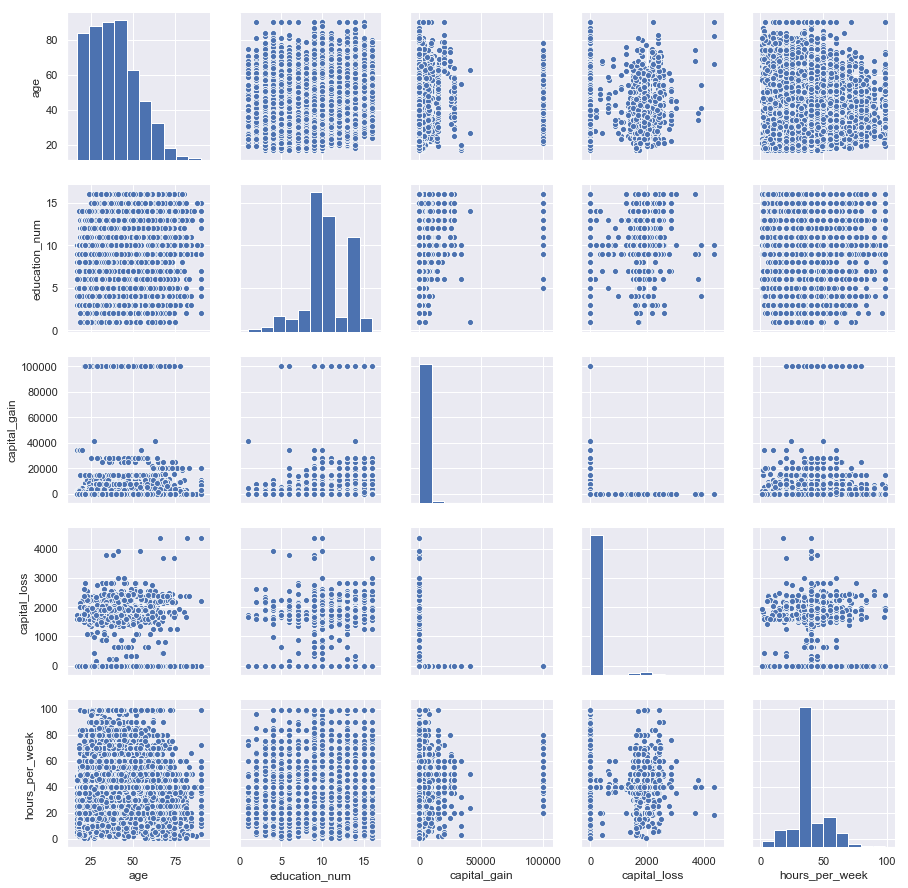

In [111]:
sns.pairplot(census_data)

Much like the relationship between jointplot() and JointGrid, the pairplot() function is built on top of a PairGrid object, which can be used directly for more flexibility:

That's it for today. Hope you learn something from my notes.

For more refer to 
<a href="http://www.themenyouwanttobe.com">TheMenYouWantToBe</a><br>
<a href="https://www.linkedin.com/in/themenyouwanttobe">LinkedIn</a><br>
<a href="https://www.twitter.com/themenuwanttobe">Twitter</a><br>
<a href="https://www.instagram.com/themenyouwanttobe">Instagram</a>